# Fair Logistic Regression performances


In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')

In [3]:
def plot_metrics_curves(df, points_start, points_end, title=''):

    metrics = {'stat_par': 'Statistical Parity', 'zero_one_loss': 'Zero One Loss',
               'disp_imp': 'Disparate Impact', 'acc': 'Accuracy'}
    _, ax = plt.subplots(1, 1, figsize=(10, 8))
    for k, v in metrics.items():
        ax = sns.lineplot(data=df, y=k, x='stop', label=v, ci='sd')
    for k, v in points_start.items():
        ax.plot(v['x'], v['y'], v['type'], markersize=10)
    for k, v in points_end.items():
        ax.plot(v['x'], v['y'], v['type'], label=k, markersize=10)
    ax.set(ylabel='Value', xlabel='Stop value')
    ax.lines[0].set_linestyle("--")
    ax.lines[0].set_marker('o')
    #lines[1] is zero_one_loss
    ax.lines[1].set_marker('x')
    ax.lines[1].set_markeredgecolor('orange')
    ax.lines[1].set_linestyle("--")

    ax.lines[2].set_marker('+')
    ax.lines[2].set_markeredgecolor('green')
    ax.lines[2].set_linestyle(":")
    ax.lines[2].set_markevery(0.001)

    ax.lines[3].set_color("black")
    ax.legend(handlelength=5, loc="upper center", bbox_to_anchor=(
        0.5, -0.03), ncol=3, fancybox=True, shadow=True)
    plt.title(title)
    plt.tight_layout()
    plt.show()

def preparepoints(metrics, iters):

    types = {'Stastical Parity (Exp Gradient)': 'xb',
             'Zero One Loss (Exp Gradient)': 'xy',
             'Disparate Impact (Exp Gradient)': 'xg',
             'Accuracy (Exp Gradient)': 'xr',
             }

    rename = {'Stastical Parity (Exp Gradient)': 'stat_par',
              'Zero One Loss (Exp Gradient)': 'zero_one_loss',
              'Disparate Impact (Exp Gradient)': 'disp_imp',
              'Accuracy (Exp Gradient)': 'acc'
              }

    points = {}

    for k in types.keys():
        points[k] = {'x': iters, 'y': np.mean(
            metrics[rename[k]]), 'type':  types[k]}

    return points

def print_metrics(metrics):
    print('Statistical parity: ', round(np.mean(
        metrics['stat_par']), 3), ' +- ', round(np.std(metrics['stat_par']), 3))
    print('Disparate impact: ', round(np.mean(
        metrics['disp_imp']), 3), ' +- ', round(np.std(metrics['disp_imp']), 3))
    print('Zero one loss: ', round(np.mean(
        metrics['zero_one_loss']), 3), ' +- ', round(np.std(metrics['zero_one_loss']), 3))
    print('Accuracy score: ', round(np.mean(
        metrics['acc']), 3), ' +- ', round(np.std(metrics['acc']), 3))

## CMC Dataset


In [3]:
cmc = pd.read_csv('cmc_data/ris/cmc_bias.csv')
cmc.mean()
print_metrics(cmc)

Statistical parity:  -0.126  +-  0.03
Disparate impact:  0.457  +-  0.109
Zero one loss:  0.01  +-  0.116
Accuracy score:  0.512  +-  0.044


In [5]:
cmc_fair = pd.read_csv('cmc_data/ris/cmc_fair.csv')
print_metrics(cmc_fair)

Statistical parity:  0.047  +-  0.063
Disparate impact:  0.587  +-  0.225
Zero one loss:  -0.006  +-  0.064
Accuracy score:  0.497  +-  0.045


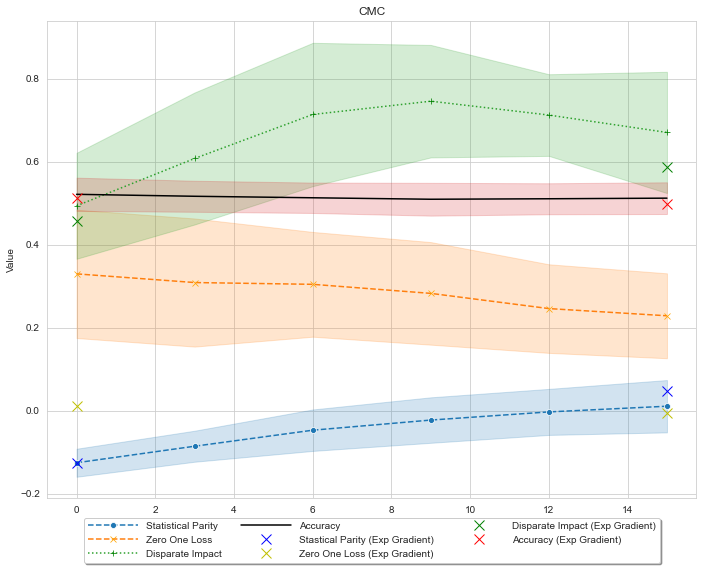

In [10]:
cmc_demv = pd.read_csv('ris_demv/cmc_eval.csv')
points_start = preparepoints(cmc, 0)
points_end = preparepoints(cmc_fair, 15)
plot_metrics_curves(cmc_demv, points_start=points_start, points_end=points_end, title='CMC')
plt.show()

## Crime Dataset

In [22]:
crime = pd.read_csv('crime_data/ris/crime_bias.csv')
print_metrics(crime)

Statistical parity:  -0.033  +-  0.027
Disparate impact:  0.624  +-  0.207
Zero one loss:  -0.033  +-  0.087
Accuracy score:  0.487  +-  0.035


In [21]:
crime_fair = pd.read_csv('crime_data/ris/crime_fair.csv')
print_metrics(crime_fair)

Statistical parity:  -0.057  +-  0.065
Disparate impact:  0.777  +-  0.156
Zero one loss:  0.011  +-  0.091
Accuracy score:  0.419  +-  0.031


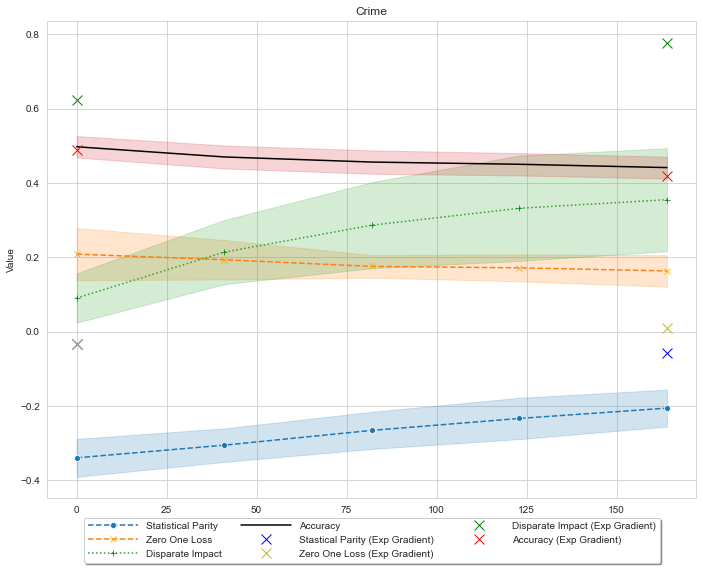

In [33]:
crime_demv = pd.read_csv('ris_demv/crime_eval.csv')
points_start = preparepoints(crime, 0)
points_end = preparepoints(crime_fair, 164)
plot_metrics_curves(crime_demv, points_start=points_start, points_end=points_end, title='Crime')
plt.show()

## Law Dataset

In [30]:
law = pd.read_csv('law_data/ris/law_bias.csv')
print_metrics(law)

Statistical parity:  -0.007  +-  0.002
Disparate impact:  0.0  +-  0.0
Zero one loss:  -0.062  +-  0.026
Accuracy score:  0.521  +-  0.01


In [31]:
law_fair = pd.read_csv('law_data/ris/law_fair.csv')
print_metrics(law_fair)

Statistical parity:  0.0  +-  0.043
Disparate impact:  0.914  +-  0.069
Zero one loss:  -0.04  +-  0.033
Accuracy score:  0.503  +-  0.009


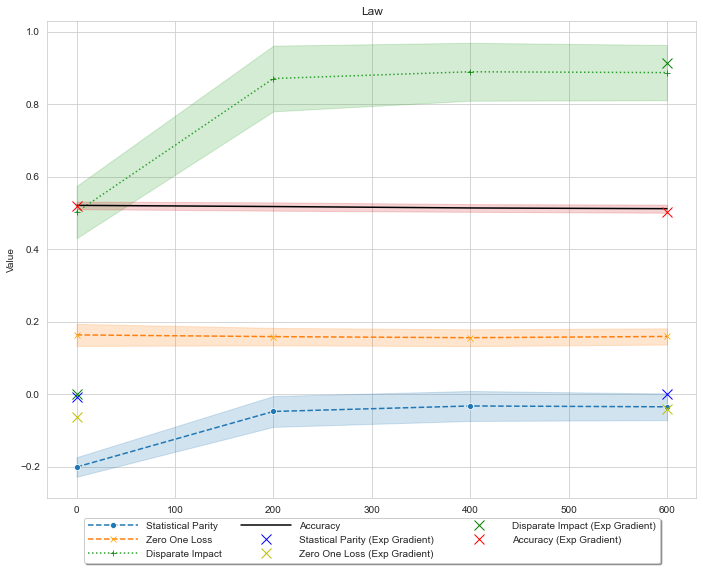

In [32]:
law_demv = pd.read_csv('ris_demv/law_eval.csv')
points_start = preparepoints(law, 0)
points_end = preparepoints(law_fair, 600)
plot_metrics_curves(law_demv, points_start=points_start, points_end=points_end, title='Law')
plt.show()

## Trump Dataset

In [4]:
trump_bias = pd.read_csv('trump_data/ris/trump_bias.csv')
print_metrics(trump_bias)

Statistical parity:  -0.096  +-  0.018
Disparate impact:  0.744  +-  0.041
Zero one loss:  0.023  +-  0.033
Accuracy score:  0.394  +-  0.014


In [5]:
trump_fair = pd.read_csv('trump_data/ris/trump_fair.csv')
print_metrics(trump_fair)

Statistical parity:  -0.003  +-  0.011
Disparate impact:  0.736  +-  0.2
Zero one loss:  0.016  +-  0.044
Accuracy score:  0.392  +-  0.01


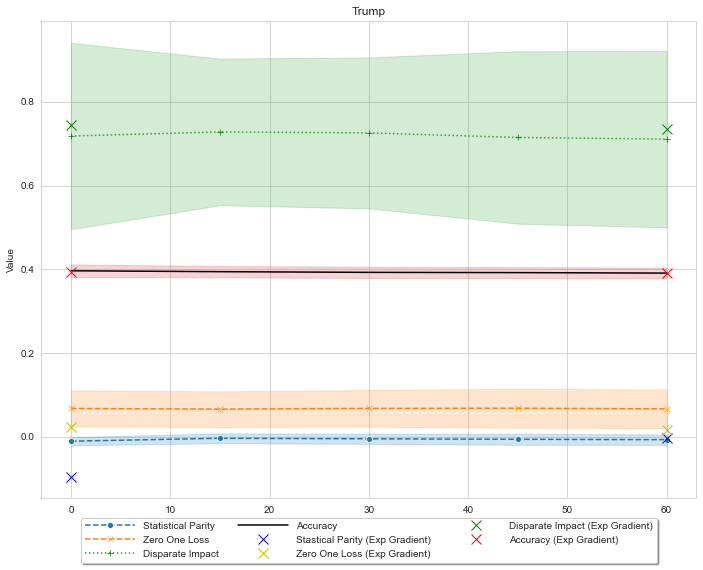

In [9]:
trump_demv = pd.read_csv('ris_demv/trump_eval.csv')
points_start = preparepoints(trump_bias, 0)
points_end = preparepoints(trump_fair, 60)
plot_metrics_curves(trump_demv, points_start=points_start, points_end=points_end, title='Trump')
plt.show()

## Wine Dataset

In [34]:
wine = pd.read_csv('wine_data/ris/wine_bias.csv')
print_metrics(wine)

Statistical parity:  0.479  +-  0.045
Disparate impact:  0.295  +-  0.032
Zero one loss:  -0.02  +-  0.039
Accuracy score:  0.538  +-  0.023


In [36]:
wine_fair = pd.read_csv('wine_data/ris/wine_fair.csv')
print_metrics(wine_fair)

Statistical parity:  0.057  +-  0.034
Disparate impact:  0.922  +-  0.029
Zero one loss:  0.006  +-  0.039
Accuracy score:  0.481  +-  0.015


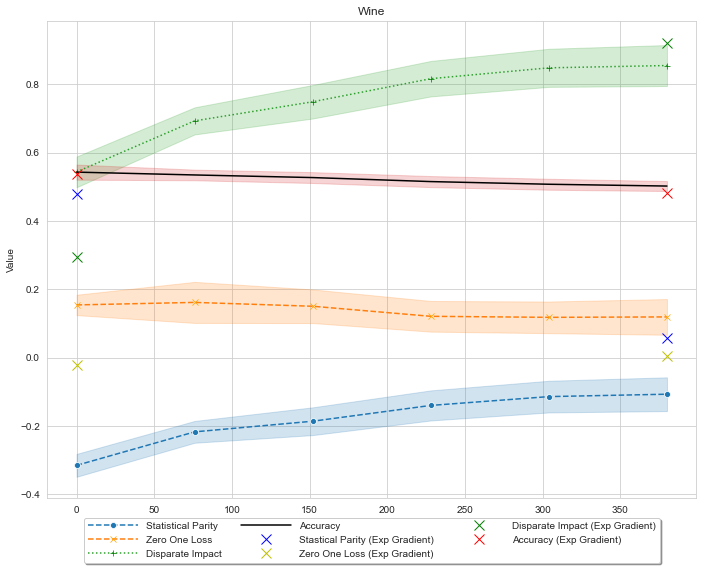

In [51]:
wine_demv = pd.read_csv('ris_demv/wine_eval.csv')
points_start = preparepoints(wine, 0)
points_end = preparepoints(wine_fair, 380)
plot_metrics_curves(wine_demv, points_start=points_start, points_end=points_end, title='Wine')
plt.show()

## Adult Dataset

In [27]:
adult_bias = pd.read_csv('adult_data/ris/adult_bias.csv')
print_metrics(adult_bias)

Statistical parity:  -0.155  +-  0.062
Disparate impact:  0.133  +-  0.083
Zero one loss:  -0.128  +-  0.02
Accuracy score:  0.822  +-  0.017


In [28]:
adult_fair = pd.read_csv('adult_data/ris/adult_fair.csv')
print_metrics(adult_fair)

Statistical parity:  -0.131  +-  0.132
Disparate impact:  0.326  +-  0.289
Zero one loss:  -0.137  +-  0.027
Accuracy score:  0.799  +-  0.023


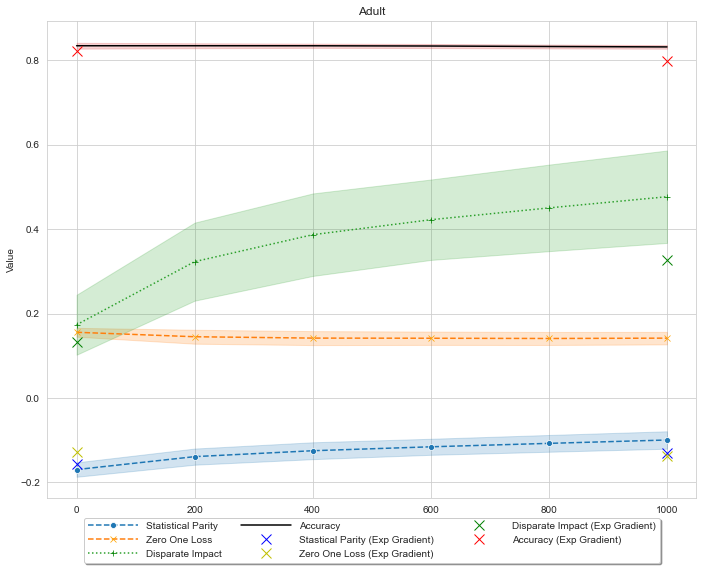

In [41]:
adult_demv = pd.read_csv('ris_demv/adult_eval.csv')
start_points = preparepoints(adult_bias, 0)
end_points = preparepoints(adult_fair, 1000)
plot_metrics_curves(adult_demv, points_start=start_points, points_end=end_points, title='Adult')
plt.show()

## COMPAS Dataset

In [44]:
compas_bias = pd.read_csv('compas_data/ris/compas_bias.csv')
print_metrics(compas_bias)

Statistical parity:  0.091  +-  0.052
Disparate impact:  0.609  +-  0.148
Zero one loss:  0.072  +-  0.046
Accuracy score:  0.594  +-  0.016


In [45]:
compas_fair = pd.read_csv('compas_data/ris/compas_fair.csv')
print_metrics(compas_fair)

Statistical parity:  0.117  +-  0.032
Disparate impact:  0.544  +-  0.085
Zero one loss:  0.061  +-  0.037
Accuracy score:  0.601  +-  0.027


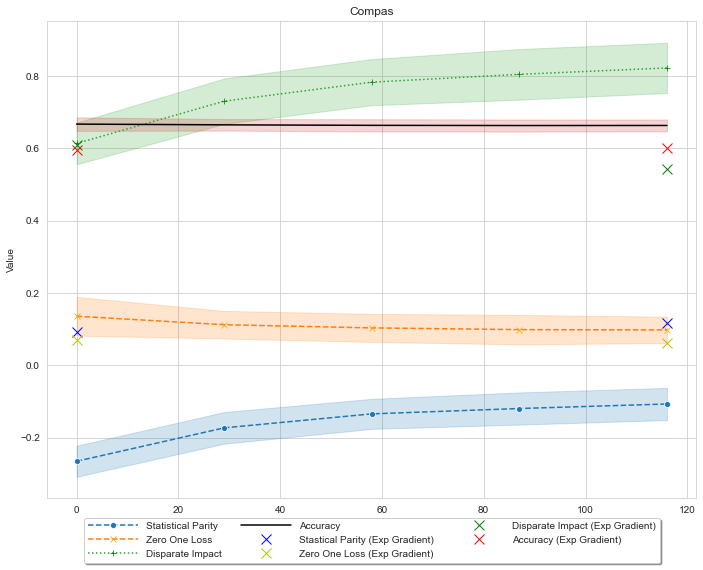

In [48]:
compas_demv = pd.read_csv('ris_demv/compas_eval.csv')
start_points = preparepoints(compas_bias, 0)
end_points = preparepoints(compas_fair, 116)
plot_metrics_curves(compas_demv, points_start=start_points, points_end=end_points, title='Compas')
plt.show()

## German Dataset

In [54]:
german_bias = pd.read_csv('german_data/ris/german_bias.csv')
print_metrics(german_bias)

Statistical parity:  -0.275  +-  0.15
Disparate impact:  0.65  +-  0.172
Zero one loss:  0.036  +-  0.142
Accuracy score:  0.746  +-  0.046


In [56]:
german_fair = pd.read_csv('german_data/ris/german_fair.csv')
print_metrics(german_fair)

Statistical parity:  -0.016  +-  0.175
Disparate impact:  0.823  +-  0.109
Zero one loss:  0.059  +-  0.092
Accuracy score:  0.743  +-  0.034


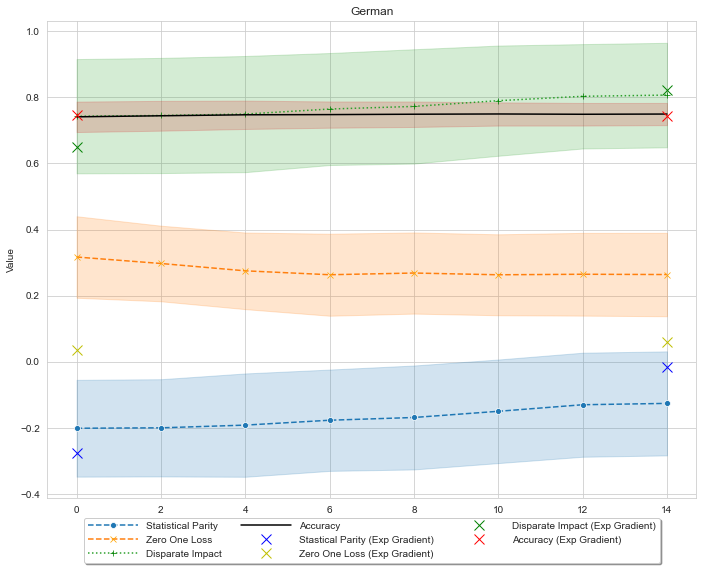

In [60]:
german_demv = pd.read_csv('ris_demv/german_eval.csv')
start_points = preparepoints(german_bias, 0)
end_points = preparepoints(german_fair, 14)
plot_metrics_curves(german_demv, points_start=start_points, points_end=end_points, title='German')
plt.show()